In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

#https://colab.research.google.com/github/JeroenMulkers/mumax3-tutorial/blob/master/postprocessing.ipynb#scrollTo=apKunwIp0s6_
def read_mumax3_ovffiles(outputdir):
    """Load all ovffiles in outputdir into a dictionary of numpy arrays 
    with the ovffilename (without extension) as key"""
    
    from subprocess import run, PIPE, STDOUT
    from glob import glob
    from os import path
    from numpy import load

    # convert all ovf files in the output directory to numpy files
    """p = run(["mumax3-convert","-numpy",outputdir+"/*.ovf"], stdout=PIPE, stderr=STDOUT)
    if p.returncode != 0:
        print(p.stdout.decode('UTF-8'))"""

    # read the numpy files (the converted ovf files)
    fields = {}
    for npyfile in glob(outputdir+"/*.npy"):
        key = path.splitext(path.basename(npyfile))[0]
        fields[key] = load(npyfile)
    
    return fields


def show_abs_my(m):
    my_abs = np.abs( m[1,0,:,:] )
    plt.figure()
    plt.imshow(my_abs, vmin=0, vmax=1)
    plt.show()


files=read_mumax3_ovffiles("run.out")

snapshots=[files[fileName] for fileName in sorted(files.keys())]
m = np.stack(snapshots)
#m[snapshotIndex, ic, iz, iy, ix]

[0 6 8]
[0.         5.99400599 7.99200799]


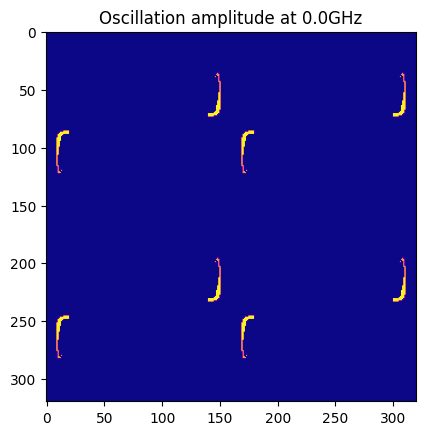

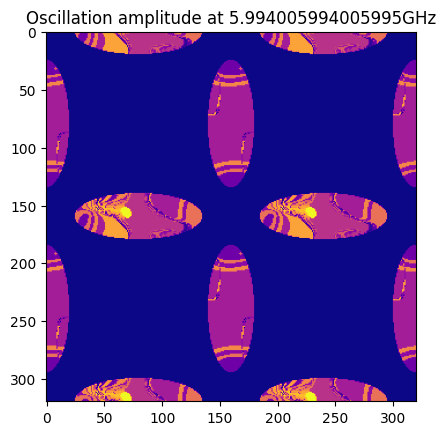

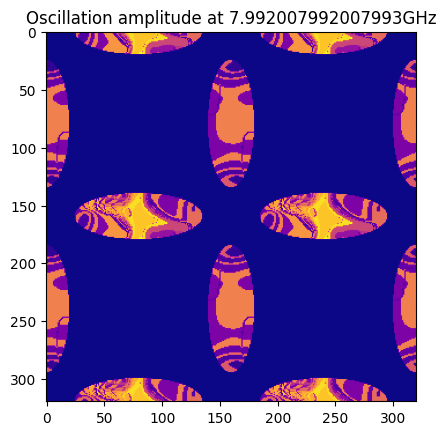

In [96]:
n=len(snapshots)
dt=1e-12
height=len(m[0][0][0])
width=len(m[0][0][0][0])

freqs=np.fft.fftfreq(n,dt)[:n//2]


frequencies=np.zeros((height,width,len(freqs)),dtype=int)
for y in range(height):
    for x in range(width):
        if m[0,0,0,y,x]==0 and m[0,1,0,y,x]==0:
            continue
            pass
        xData=m[:,0,0,y,x]

        xFFT=np.fft.fft(xData)[:n//2]
        frequencies[y][x]=np.argsort(-np.abs(xFFT))
        


peakFreqsI=np.unique(frequencies[:,:,0])
print(peakFreqsI)
peakFreqs=freqs[peakFreqsI]
print(peakFreqs*1e-9)
for i in peakFreqsI:
    plt.imshow(np.abs(frequencies[:,:,i]),cmap="plasma")
    plt.title(f"Oscillation amplitude at {freqs[i]*1e-9}GHz")
    plt.show()


#plt.imshow(frequencies[:,:,0],cmap="plasma")

In [28]:
a=np.array([[[1,2],[3,4]],[[3,100],[4]]])
np.ravel(a)

/var/folders/rl/cpjcq0556r36l75xt982r2kh0000gn/T/ipykernel_89273/1137754449.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a=np.array([[[1,2],[3,4]],[[3,100],[4]]])


array([list([1, 2]), list([3, 4]), list([3, 100]), list([4])],
      dtype=object)